# Load in necessary packages as well as helper functions

In [1]:
import pandas as pd
import pymc as pm
import matplotlib.pyplot as plt
import arviz as az
from scipy import special, stats
import numpy as np

In [2]:
import arviz as az
import matplotlib.dates as mdates
import pytensor.tensor as pt
import seaborn as sns
import xarray as xr
def format_x_axis(ax, minor=False):
    # major ticks
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y %b"))
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.grid(which="major", linestyle="-", axis="x")
    # minor ticks
    if minor:
        ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y %b"))
        ax.xaxis.set_minor_locator(mdates.MonthLocator())
        ax.grid(which="minor", linestyle=":", axis="x")
    # rotate labels
    for label in ax.get_xticklabels(which="both"):
        label.set(rotation=70, horizontalalignment="right")


def plot_xY(x, Y, ax, label=''):
    quantiles = Y.quantile((0.025, 0.25, 0.5, 0.75, 0.975), dim=("chain", "draw")).transpose()

    #az.plot_hdi(
     #   x,
     #   hdi_data=quantiles.sel(quantile=[0.025, 0.975]),
     #   fill_kwargs={"alpha": 0.25},
      #  smooth=False,
      # ax=ax,
    #)
    az.plot_hdi(
       x,
        hdi_data=quantiles.sel(quantile=[0.25, 0.75]),
        fill_kwargs={"alpha": 0.5},
        smooth=False,
        ax=ax,
    )
    ax.plot(x, quantiles.sel(quantile=0.5), color="C1", lw=3, label=label)


# default figure sizes
figsize = (10, 5)

# Load in our data

In [3]:
merged_df= pd.read_csv('/Users/bpugs/Desktop/Bayes/final_project_data_new.csv')
merged_df = merged_df.drop(['Unnamed: 0'], axis=1)

# Exploratory Analysis

### *Calculate Summary Statistics*

In [4]:
important_cols = ['ZHVIPerSqft_AllHomes', 'materials', 'trade', 'public', 'service', 'information', 'industry', 'other']
merged_df.describe()[important_cols]

,ZHVIPerSqft_AllHomes,materials,trade,public,service,information,industry,other
count,12225.000000,12225.000000,12225.000000,12225.000000,12225.000000,1.222500e+04,12225.000000,12225.000000
mean,117.808425,7690.395872,41643.339839,61982.705505,10716.957246,1.004308e+05,46931.008294,6386.602537
std,63.207918,18479.487423,51745.368865,73288.411043,14583.665430,1.480565e+05,56178.175854,7673.713305
min,35.000000,0.100000,1694.200000,3615.350000,614.175000,2.976875e+03,907.816667,407.250000
25%,78.000000,1485.358333,9987.200000,16934.283333,2593.900000,2.134797e+04,9105.750000,1561.000000
50%,100.000000,3885.125000,26462.575000,39634.925000,6463.200000,5.109210e+04,32921.816667,4264.700000
75%,142.000000,6525.650000,49375.700000,75294.300000,12464.650000,1.225413e+05,61639.300000,7763.800000
max,499.000000,213573.000000,379665.100000,588158.033333,129663.258333,1.329861e+06,430891.300000,55852.408333


### *Correlation*

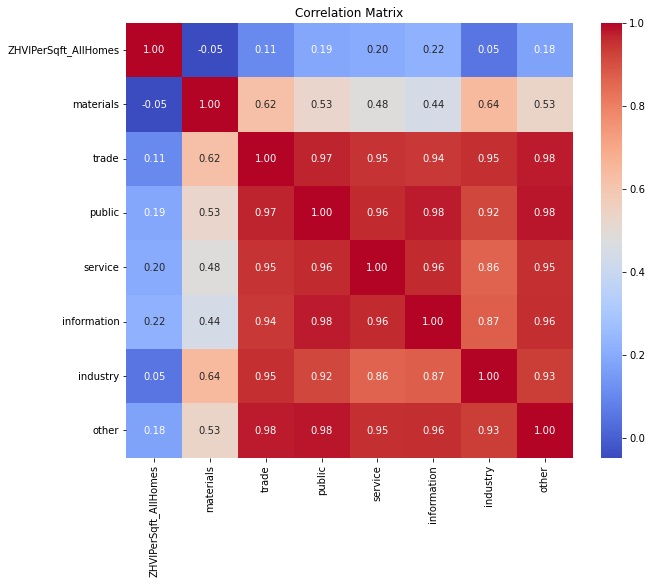

In [5]:
corr_matrix = merged_df[important_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### It's apparent that most industries are highly correlated with one another, with the exception of *Materials* being somewhat distinct. It comes with little surprise that *ZHVIPerSqft_AllHomes* is not highly correlated with the different industries since it is measuring a completely different value.

### *Density Plots*

/var/folders/x_/qkfj00656_qg6nsj5fclf5sc0000gn/T/ipykernel_88972/4199236995.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=merged_df, x=predictor, kde=True, stat="density", multiple="layer", palette="Set2")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


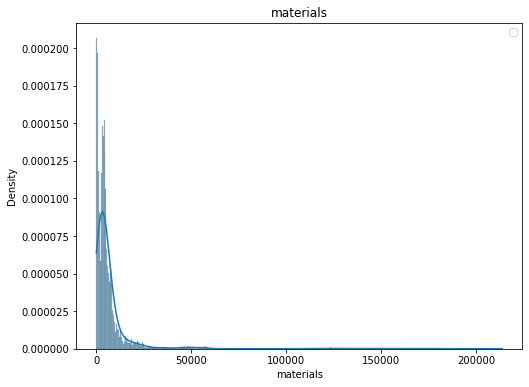

/var/folders/x_/qkfj00656_qg6nsj5fclf5sc0000gn/T/ipykernel_88972/4199236995.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=merged_df, x=predictor, kde=True, stat="density", multiple="layer", palette="Set2")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


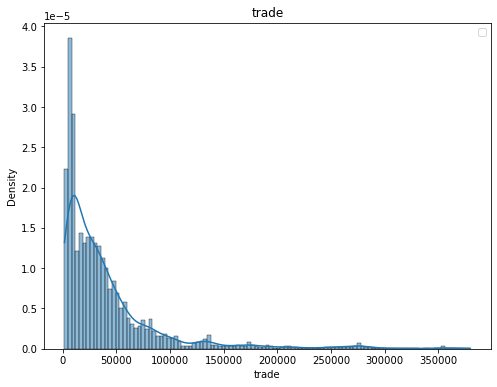

/var/folders/x_/qkfj00656_qg6nsj5fclf5sc0000gn/T/ipykernel_88972/4199236995.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=merged_df, x=predictor, kde=True, stat="density", multiple="layer", palette="Set2")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


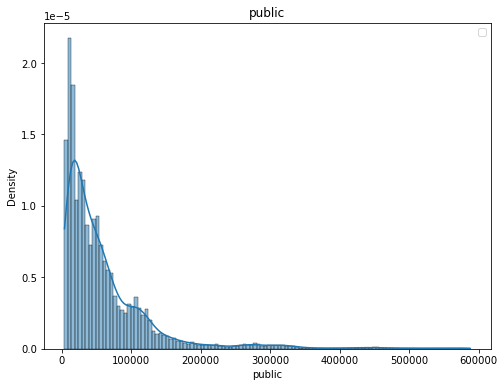

/var/folders/x_/qkfj00656_qg6nsj5fclf5sc0000gn/T/ipykernel_88972/4199236995.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=merged_df, x=predictor, kde=True, stat="density", multiple="layer", palette="Set2")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


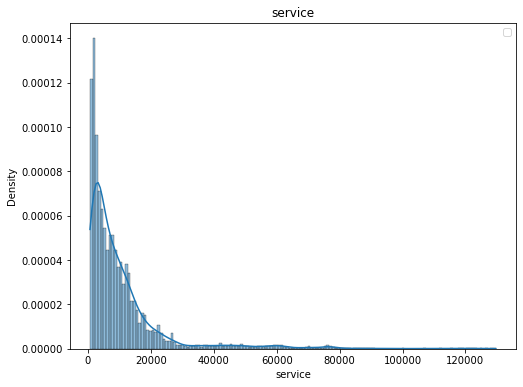

/var/folders/x_/qkfj00656_qg6nsj5fclf5sc0000gn/T/ipykernel_88972/4199236995.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=merged_df, x=predictor, kde=True, stat="density", multiple="layer", palette="Set2")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


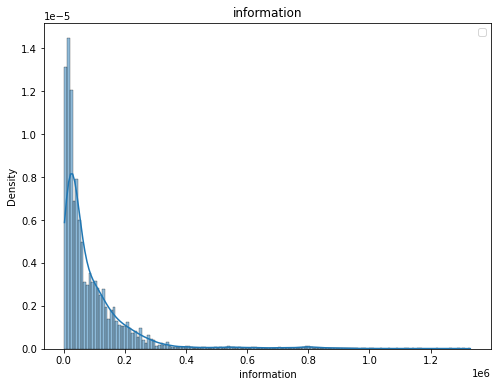

/var/folders/x_/qkfj00656_qg6nsj5fclf5sc0000gn/T/ipykernel_88972/4199236995.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=merged_df, x=predictor, kde=True, stat="density", multiple="layer", palette="Set2")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


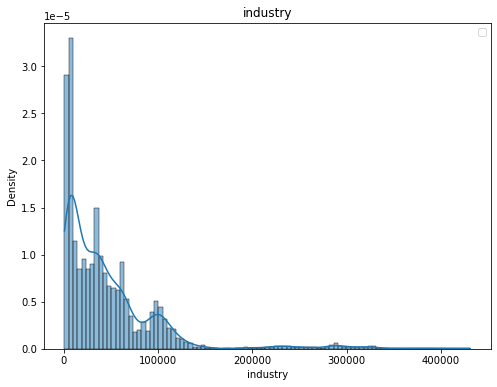

/var/folders/x_/qkfj00656_qg6nsj5fclf5sc0000gn/T/ipykernel_88972/4199236995.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=merged_df, x=predictor, kde=True, stat="density", multiple="layer", palette="Set2")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


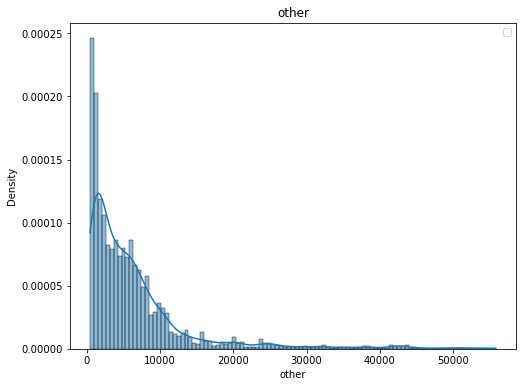

/var/folders/x_/qkfj00656_qg6nsj5fclf5sc0000gn/T/ipykernel_88972/4199236995.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=merged_df, x=predictor, kde=True, stat="density", multiple="layer", palette="Set2")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


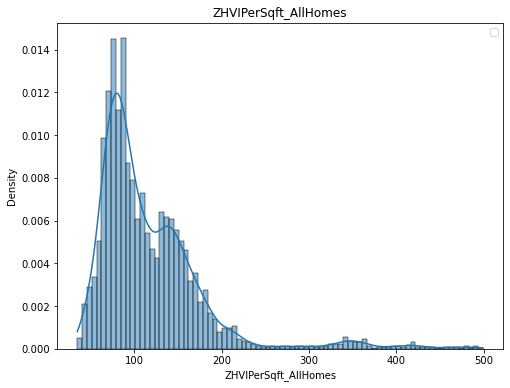

In [6]:

# List of predictor columns (replace these with your actual predictor columns)
columns = ['materials', 'trade', 'public', 'service', 'information', 'industry', 'other', 'ZHVIPerSqft_AllHomes']

# Loop through predictor columns and create density plots
for predictor in columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=merged_df, x=predictor, kde=True, stat="density", multiple="layer", palette="Set2")
    plt.title(f'{predictor}')
    plt.xlabel(predictor)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

### It appears that all of our features including the target has a strong right skew. Let's do a log transformation

# Data Preprocessing

In [7]:
merged_df.head()

,ZHVIPerSqft_AllHomes,year,month,GeoName,materials,trade,public,service,information,industry,other,instance
0,49.0,1997,1,Alabama,3055.9,18202.8,27356.2,2520.7,26501.4,24216.1,2863.7,1
1,63.0,1997,1,Arizona,3110.1,22043.0,29169.9,5301.4,41191.6,28215.1,3259.8,1
2,42.0,1997,1,Arkansas,3091.6,10810.5,13259.2,1486.5,13524.9,16061.7,1592.5,1
3,101.0,1997,1,California,24874.7,169220.3,213500.0,40732.6,400052.5,191768.9,31178.1,1
4,85.0,1997,1,Colorado,3374.5,20869.5,28713.6,5719.8,53200.4,21320.2,3718.8,1


## We tried scaling the data through a log transformation, but we liked the unscaled model better

In [8]:

merged_df = merged_df[merged_df['month'] == 1]
merged_df['instance']= (merged_df['year'] - 1997) +1


In [57]:
merged_df[merged_df['GeoName'] == 'NewYork']

,ZHVIPerSqft_AllHomes,year,month,GeoName,materials,trade,public,service,information,industry,other,instance
6256,166.0,2008,1,NewYork,-0.198588,1.859683,2.660419,2.427440,3.025476,1.072820,2.314733,0.55
6856,149.0,2009,1,NewYork,-0.244703,1.801037,2.834890,2.488691,3.290828,1.100364,2.301456,0.60
7456,137.0,2010,1,NewYork,-0.210282,1.976912,2.991079,2.659341,3.577391,1.044333,2.294441,0.65
8056,131.0,2011,1,NewYork,-0.188229,2.091605,3.043754,2.827974,3.699107,0.937918,2.382268,0.70
8656,128.0,2012,1,NewYork,-0.203593,2.221416,3.114022,3.170698,4.166671,0.954730,2.565638,0.75
9256,128.0,2013,1,NewYork,-0.184532,2.344454,3.291772,3.386347,4.251716,1.009501,2.668513,0.80
9856,130.0,2014,1,NewYork,-0.177481,2.435855,3.394310,3.498673,4.555987,1.092008,2.864750,0.85


In [10]:
preserved = merged_df.copy()

## Normalize then Split between test and train

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Columns to normalize

columns_to_normalize = ['materials', 'trade',	'public',	'service',	'information'	,'industry'	,'other']
#columns_to_normalize = ['information']
columns_to_scale = ['instance']

# Apply Min-Max scaling to selected columns
for column in columns_to_normalize:
   mean_val = merged_df[column].mean()
   std_val = merged_df[column].std()
   merged_df[column] = (merged_df[column] - mean_val) / std_val


for column in columns_to_scale:
    min_val = merged_df[column].min()
    max_val = merged_df[column].max()
    merged_df[column] = (merged_df[column] - min_val) / (max_val - min_val)



In [12]:
post = merged_df[(merged_df['year'] >= 2015)]
merged_df = merged_df[(merged_df.year<2015)]

In [13]:
merged_df

,ZHVIPerSqft_AllHomes,year,month,GeoName,materials,trade,public,service,information,industry,other,instance
0,49.0,1997,1,Alabama,-0.245107,-0.447456,-0.465527,-0.559156,-0.496677,-0.400087,-0.453647,0.00
1,63.0,1997,1,Arizona,-0.242143,-0.371967,-0.440322,-0.363855,-0.394989,-0.327779,-0.401318,0.00
2,42.0,1997,1,Arkansas,-0.243155,-0.592769,-0.661431,-0.631793,-0.586502,-0.547530,-0.621586,0.00
3,101.0,1997,1,California,0.948291,2.521154,2.121290,2.124644,2.089090,2.629505,3.286989,0.00
4,85.0,1997,1,Colorado,-0.227681,-0.395035,-0.446663,-0.334469,-0.311863,-0.452449,-0.340679,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
9870,132.0,2014,1,Virginia,-0.217902,0.294508,0.917530,0.260826,0.663738,0.211752,0.719642,0.85
9871,148.0,2014,1,Washington,0.002955,0.519802,0.482120,0.346155,0.493534,0.586124,0.312305,0.85
9872,68.0,2014,1,WestVirginia,0.100849,-0.599631,-0.555303,-0.538297,-0.568515,-0.645573,-0.640385,0.85
9873,96.0,2014,1,Wisconsin,-0.032866,0.030217,0.091076,-0.101409,-0.028413,0.383439,-0.005871,0.85


# Modeling

In [14]:
merged_df['GeoName'] = merged_df['GeoName'].astype('category')
district_idx = merged_df.GeoName.cat.codes.values

district_codes = merged_df.GeoName.cat.categories
n_district = district_codes.size

/var/folders/x_/qkfj00656_qg6nsj5fclf5sc0000gn/T/ipykernel_88972/2418669828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['GeoName'] = merged_df['GeoName'].astype('category')


In [15]:
mn_states = merged_df['GeoName'].unique()
num = merged_df.instance.values
coords = {"obs_id": np.arange(num.size)}
coords["State"] = mn_states

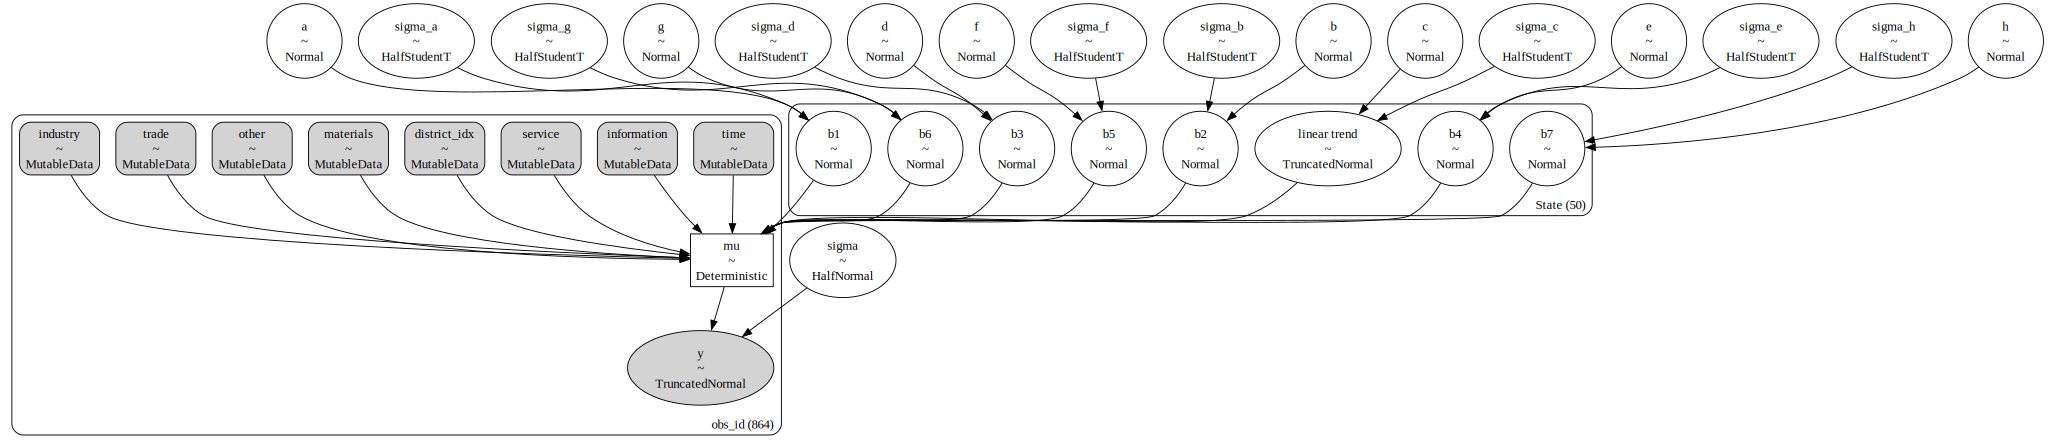

In [16]:
with pm.Model() as hierarchical_model:
    hierarchical_model.add_coord('obs_id',np.arange(num.size), mutable = True)
    hierarchical_model.add_coord('State',mn_states, mutable = True)
    
    district_idx = pm.Data("district_idx", district_idx, dims="obs_id", mutable =True)

#Hyperpriors


    a = pm.Normal("a", mu=50, sigma= 50)
    sigma_a = pm.HalfStudentT('sigma_a',50,10)
    beta1 = pm.Normal("b1", mu=a, sigma=sigma_a, dims="State")


    b = pm.Normal("b", mu=0.0, sigma=300)
    sigma_b = pm.HalfStudentT('sigma_b',50,10)
    beta2 = pm.Normal("b2", mu=b, sigma=sigma_b, dims="State")

    c = pm.Normal("c", mu=0.0, sigma= 100)
    sigma_c = pm.HalfStudentT('sigma_c',25,10)
    linear_trend = pm.TruncatedNormal("linear trend", mu = c, sigma = sigma_c, lower=0, dims="State")


    d = pm.Normal("d", mu=0.0, sigma=300)
    sigma_d = pm.HalfStudentT('sigma_d',50,10)
    beta3 = pm.Normal("b3", mu=d, sigma=sigma_d, dims="State")

    e = pm.Normal("e", mu=0.0, sigma=300)
    sigma_e = pm.HalfStudentT('sigma_e',50,10)
    beta4 = pm.Normal("b4", mu=e, sigma=sigma_e, dims="State")

    f = pm.Normal("f", mu=0.0, sigma=300)
    sigma_f = pm.HalfStudentT('sigma_f',50,10)
    beta5 = pm.Normal("b5", mu=f, sigma=sigma_f, dims="State")

    g = pm.Normal("g", mu=0.0, sigma=300)
    sigma_g = pm.HalfStudentT('sigma_g',50,10)
    beta6 = pm.Normal("b6", mu=g, sigma=sigma_g, dims="State")

    h = pm.Normal("h", mu=0.0, sigma=300)
    sigma_h = pm.HalfStudentT('sigma_h',50,10)
    beta7 = pm.Normal("b7", mu=h, sigma=sigma_h, dims="State")



    information = pm.MutableData("information",  merged_df['information'].to_numpy(), dims="obs_id")
    materials = pm.MutableData("materials",  merged_df['materials'].to_numpy(), dims="obs_id")
    trade = pm.MutableData("trade",  merged_df['trade'].to_numpy(), dims="obs_id")
    service = pm.MutableData("service",  merged_df['service'].to_numpy(), dims="obs_id")
    industry = pm.MutableData("industry",  merged_df['industry'].to_numpy(), dims="obs_id")
    other = pm.MutableData("other",  merged_df['other'].to_numpy(), dims="obs_id")

    time = pm.MutableData('time', merged_df['instance'].to_numpy(), dims="obs_id")

    
    

    # Expected value per county:
    mu = pm.Deterministic("mu", beta1[district_idx] + (beta2[district_idx] * information)  + (time * linear_trend[district_idx])+
                         (beta3[district_idx]* materials) + (beta4[district_idx] * trade) + (beta5[district_idx]*service) + (beta6[district_idx] * industry) +
                         (beta7[district_idx] *other), dims="obs_id")

    sigma = pm.HalfNormal("sigma", 20)
    
    # likelihood
    y = pm.TruncatedNormal("y", mu=mu, sigma=sigma, lower=0, observed=merged_df['ZHVIPerSqft_AllHomes'], dims="obs_id")

pm.model_to_graphviz(hierarchical_model)

Sampling: [a, b, b1, b2, b3, b4, b5, b6, b7, c, d, e, f, g, h, linear trend, sigma, sigma_a, sigma_b, sigma_c, sigma_d, sigma_e, sigma_f, sigma_g, sigma_h, y]


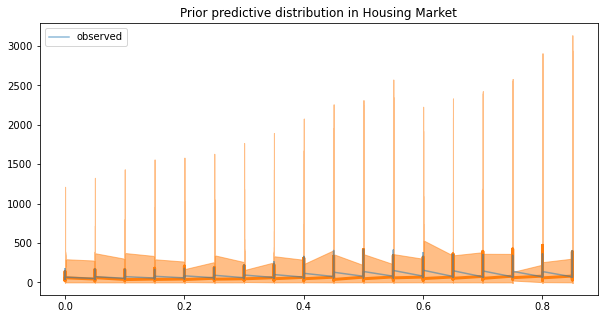

In [17]:

with hierarchical_model:
   idata = pm.sample_prior_predictive(random_seed=2002)


fig, ax = plt.subplots(figsize=figsize)

plot_xY(merged_df.instance, idata.prior_predictive["y"], ax)
ax.plot(merged_df.instance, merged_df['ZHVIPerSqft_AllHomes'], label="observed", alpha= .5)
ax.set(title="Prior predictive distribution in Housing Market")
plt.legend();

## Fit our model!

In [18]:
with hierarchical_model:
    advi = pm.ADVI()

In [19]:
advi.approx.shared_params
#advi.approx.mean.eval(), advi.approx.std.eval()

{'mu': mu, 'rho': rho}

In [20]:
tracker = pm.callbacks.Tracker(
    mean=advi.approx.mean.eval,  # callable that returns mean
    std=advi.approx.std.eval,  # callable that returns std
)

Finished [100%]: Average Loss = 4,197.3


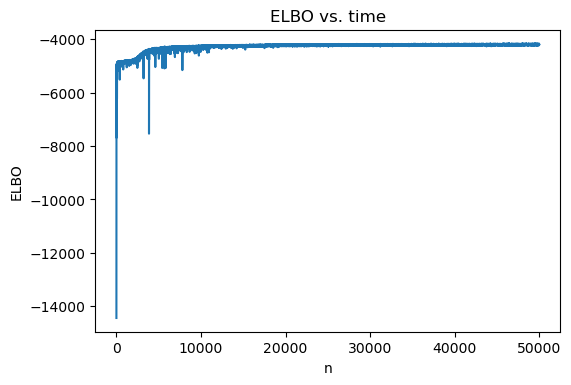

In [21]:
with hierarchical_model:
    advi_fit = pm.fit(50000, method='advi', random_seed = 2002, obj_optimizer=pm.adagrad(learning_rate=.25),  
                      callbacks=[pm.callbacks.CheckParametersConvergence(diff="absolute"),tracker])

import seaborn as sns
advi_elbo = pd.DataFrame(
    {'ELBO': -advi_fit.hist,
     'n': np.arange(advi_fit.hist.shape[0])})

plt.figure(dpi=100)
ax = sns.lineplot(y='ELBO', x='n', data=advi_elbo)
ax.set_title("ELBO vs. time")
plt.show()

### Our model seemed to have converged around 15,000 observations!

In [23]:
advi_samples = 5000

algea_advi_tracee = advi_fit.sample(advi_samples, return_inferencedata= False)

algea_advi_trace = pm.to_inference_data(trace= algea_advi_tracee, model = hierarchical_model, log_likelihood=True)

## Let's fit unpooled and pooled models to compare results 

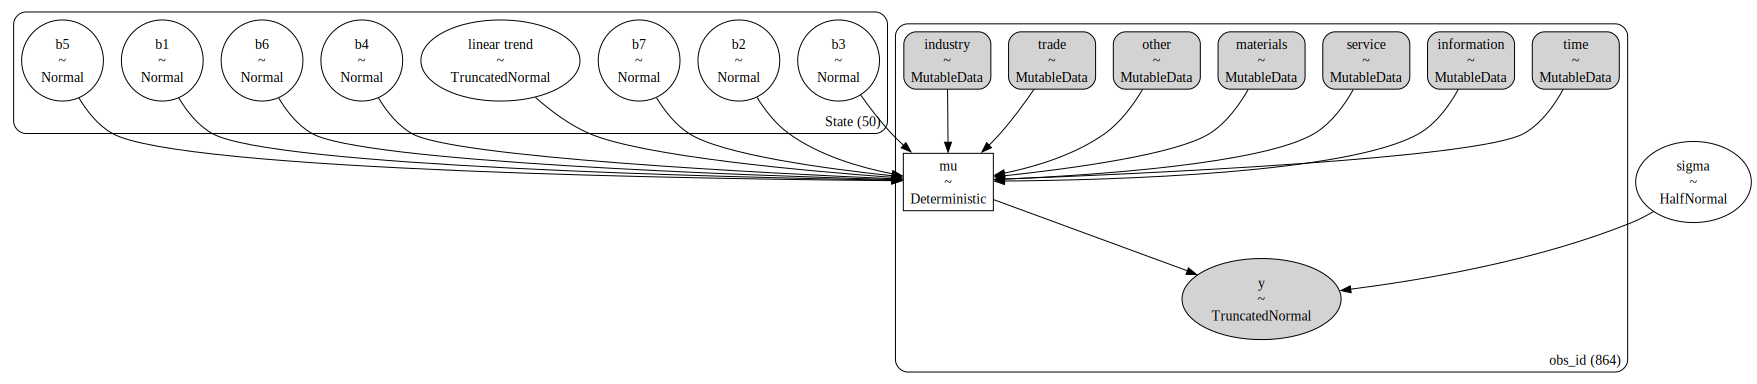

In [24]:
with pm.Model() as unpooled_model:
    unpooled_model.add_coord('obs_id',np.arange(num.size), mutable = True)
    unpooled_model.add_coord('State',mn_states, mutable = True)
    
    #district_idx = pm.Data("district_idx", district_idx, dims="obs_id", mutable =True)

#priors
   
    beta1 = pm.Normal("b1", mu=50, sigma=50, dims="State")

    beta2 = pm.Normal("b2", mu=0, sigma=300, dims="State")


    linear_trend = pm.TruncatedNormal("linear trend", mu = 0, sigma = 100, lower=0, dims="State")
    

    beta3 = pm.Normal("b3", mu=0, sigma=300, dims="State")


    beta4 = pm.Normal("b4",  mu=0.0, sigma=300, dims="State")

 
    beta5 = pm.Normal("b5", mu=0.0, sigma=300, dims="State")


    beta6 = pm.Normal("b6",  mu=0.0, sigma=300, dims="State")

    beta7 = pm.Normal("b7",  mu=0.0, sigma=300, dims="State")



    information = pm.MutableData("information",  merged_df['information'].to_numpy(), dims="obs_id")
    materials = pm.MutableData("materials",  merged_df['materials'].to_numpy(), dims="obs_id")
    trade = pm.MutableData("trade",  merged_df['trade'].to_numpy(), dims="obs_id")
    service = pm.MutableData("service",  merged_df['service'].to_numpy(), dims="obs_id")
    industry = pm.MutableData("industry",  merged_df['industry'].to_numpy(), dims="obs_id")
    other = pm.MutableData("other",  merged_df['other'].to_numpy(), dims="obs_id")

    time = pm.MutableData('time', merged_df['instance'].to_numpy(), dims="obs_id")

    
    

    # Expected value per county:
    mu = pm.Deterministic("mu", beta1[district_idx] + (beta2[district_idx] * information)  + (time * linear_trend[district_idx])+
                         (beta3[district_idx]* materials) + (beta4[district_idx] * trade) + (beta5[district_idx]*service) + (beta6[district_idx] * industry) +
                         (beta7[district_idx] *other), dims="obs_id")

    sigma = pm.HalfNormal("sigma", 20)
    
    # likelihood
    y = pm.TruncatedNormal("y", mu=mu, sigma=sigma, lower=0, observed=merged_df['ZHVIPerSqft_AllHomes'], dims="obs_id")

pm.model_to_graphviz(unpooled_model)

In [25]:
with unpooled_model:
    advi_fit_unpoo = pm.fit(50000, method='advi', random_seed = 2002, obj_optimizer=pm.adagrad(learning_rate=.25),  
                      callbacks=[pm.callbacks.CheckParametersConvergence(diff="absolute")])


Finished [100%]: Average Loss = 4,971


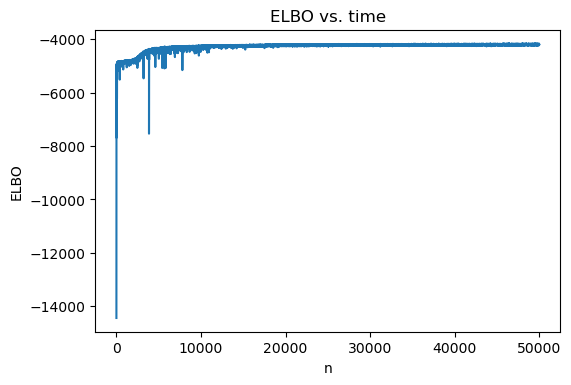

In [26]:

import seaborn as sns
advi_elbo = pd.DataFrame(
    {'ELBO': -advi_fit.hist,
     'n': np.arange(advi_fit.hist.shape[0])})

plt.figure(dpi=100)
ax = sns.lineplot(y='ELBO', x='n', data=advi_elbo)
ax.set_title("ELBO vs. time")
plt.show()

### This unpooled model converged as well!

In [27]:
advi_samples = 5000
algea_advi_trace_unpo = advi_fit_unpoo.sample(advi_samples, return_inferencedata= False)
algea_advi_trace_unpoo = pm.to_inference_data(trace= algea_advi_trace_unpo, model = unpooled_model, log_likelihood= True)

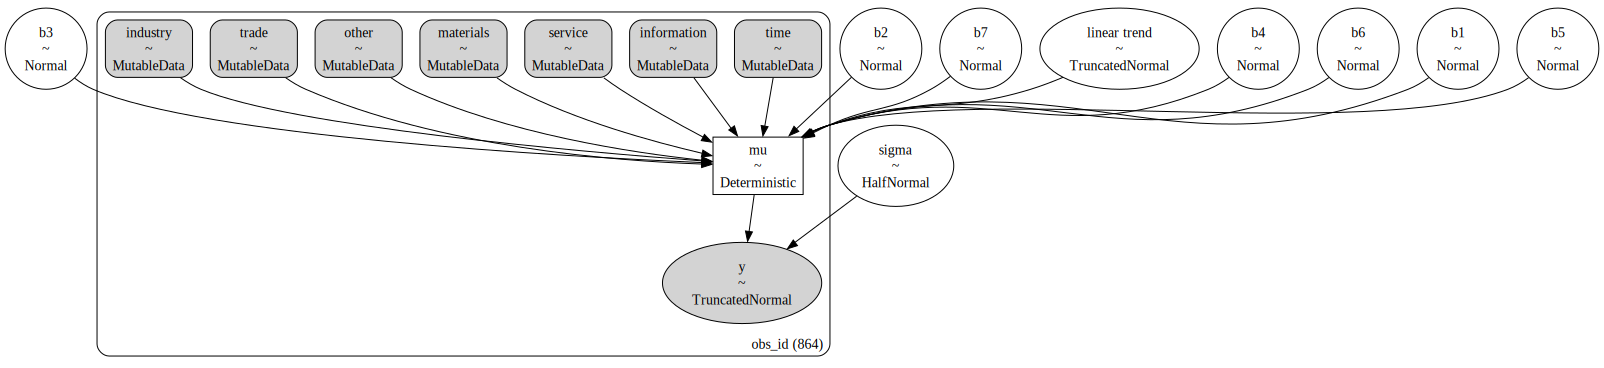

In [28]:
with pm.Model() as poo_model:
    poo_model.add_coord('obs_id',np.arange(num.size), mutable = True)
    #hierarchical_model.add_coord('State',mn_states, mutable = True)

    #district_idx = pm.Data("district_idx", district_idx, dims="obs_id", mutable =True)

#Hyperpriors
    #a = pm.Normal("a", mu=50, sigma= 50)
    #sigma_a = pm.HalfStudentT('sigma_a',50,10)
    beta1 = pm.Normal("b1", mu=50, sigma=50)


    #b = pm.Normal("b", mu=0.0, sigma=300)
    #sigma_b = pm.HalfStudentT('sigma_b',50,10)
    beta2 = pm.Normal("b2", mu=0, sigma=300)

    #c = pm.Normal("c", mu=0.0, sigma= 100)
    #sigma_c = pm.HalfStudentT('sigma_c',25,10)
    linear_trend = pm.TruncatedNormal("linear trend", mu = 0, sigma = 100, lower=0)


    #d = pm.Normal("d", mu=0.0, sigma=300)
    #sigma_d = pm.HalfStudentT('sigma_d',50,10)
    beta3 = pm.Normal("b3", mu=0, sigma=300)

    #e = pm.Normal("e", mu=0.0, sigma=300)
    #sigma_e = pm.HalfStudentT('sigma_e',50,10)
    beta4 = pm.Normal("b4", mu=0, sigma=300)

    #f = pm.Normal("f", mu=0.0, sigma=300)
    #sigma_f = pm.HalfStudentT('sigma_f',50,10)
    beta5 = pm.Normal("b5", mu=0, sigma=300)

    #g = pm.Normal("g", mu=0.0, sigma=300)
    #sigma_g = pm.HalfStudentT('sigma_g',50,10)
    beta6 = pm.Normal("b6", mu=0, sigma=300)

    #h = pm.Normal("h", mu=0.0, sigma=300)
    #sigma_h = pm.HalfStudentT('sigma_h',50,10)
    beta7 = pm.Normal("b7", mu=0, sigma=300)



    information = pm.MutableData("information",  merged_df['information'].to_numpy(), dims="obs_id")
    materials = pm.MutableData("materials",  merged_df['materials'].to_numpy(), dims="obs_id")
    trade = pm.MutableData("trade",  merged_df['trade'].to_numpy(), dims="obs_id")
    service = pm.MutableData("service",  merged_df['service'].to_numpy(), dims="obs_id")
    industry = pm.MutableData("industry",  merged_df['industry'].to_numpy(), dims="obs_id")
    other = pm.MutableData("other",  merged_df['other'].to_numpy(), dims="obs_id")

    time = pm.MutableData('time', merged_df['instance'].to_numpy(), dims="obs_id")




    # Expected value per county:
    mu = pm.Deterministic("mu", beta1 + (beta2 * information)  + (time * linear_trend)+
                         (beta3* materials) + (beta4 * trade) + (beta5*service) + (beta6 * industry) +
                         (beta7 *other), dims="obs_id")

    sigma = pm.HalfNormal("sigma", 20)

    # likelihood
    y = pm.TruncatedNormal("y", mu=mu, sigma=sigma, lower=0, observed=merged_df['ZHVIPerSqft_AllHomes'], dims="obs_id")

pm.model_to_graphviz(poo_model)

In [29]:
with poo_model:
    advi_fit_poo = pm.fit(50000, method='advi', random_seed = 2002, obj_optimizer=pm.adagrad(learning_rate=.25),  
                      callbacks=[pm.callbacks.CheckParametersConvergence(diff="absolute")])

Finished [100%]: Average Loss = 4,641.2


In [30]:
algea_advi_trace_po = advi_fit_poo.sample(advi_samples, return_inferencedata= False)
algea_advi_trace_poo = pm.to_inference_data(trace= algea_advi_trace_po, model = poo_model, log_likelihood= True)

## WAIC comparison

In [31]:
az.compare({'model_unpoo':algea_advi_trace_unpoo, 'model_high': algea_advi_trace, 'poo': algea_advi_trace_poo}, ic='waic')

/opt/anaconda3/envs/bayesml/lib/python3.11/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/opt/anaconda3/envs/bayesml/lib/python3.11/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/opt/anaconda3/envs/bayesml/lib/python3.11/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
model_high,0,-4066.254670,159.541253,0.000000,0.978837,40.340760,0.000000,True,log
model_unpoo,1,-4377.908259,316.881045,311.653589,0.000000,28.460460,17.789696,True,log
poo,2,-4623.609904,33.509469,557.355234,0.021163,42.940588,33.834422,True,log


### As you can see our hierarchical model received 97.8% of the weight meaning that it is the favored model by far. Let's check the diagnostics

In [32]:
az.loo(algea_advi_trace)

/opt/anaconda3/envs/bayesml/lib/python3.11/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 5000 posterior samples and 864 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -4078.67    40.92
p_loo      171.96        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      726   84.0%
 (0.5, 0.7]   (ok)         92   10.6%
   (0.7, 1]   (bad)        40    4.6%
   (1, Inf)   (very bad)    6    0.7%

### 94.6% of our observations are good or ok, so let's move forward with predictions!

In [35]:
with hierarchical_model:
    algea_advi_trace.extend(pm.sample_posterior_predictive(algea_advi_trace, random_seed=2002,  extend_inferencedata=True))

Sampling: [y]


## Model Evaluation

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

<Figure size 720x1728 with 0 Axes>

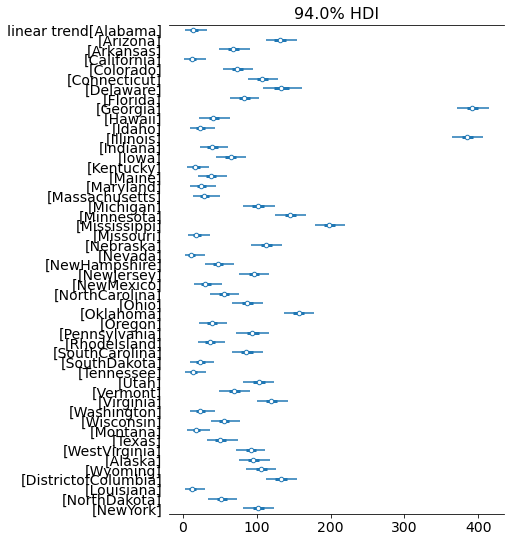

In [37]:
plt.figure(figsize=(10,24))
az.plot_forest(algea_advi_trace, var_names=['linear trend'])

### As you can see the coefficients for linear trend vary signifantly by state, this is supporting evidence that a hierarchical model was indeed needed. A similar relationship was seen in the other coefficients and intercepts. 

## Let's check out posterior fit

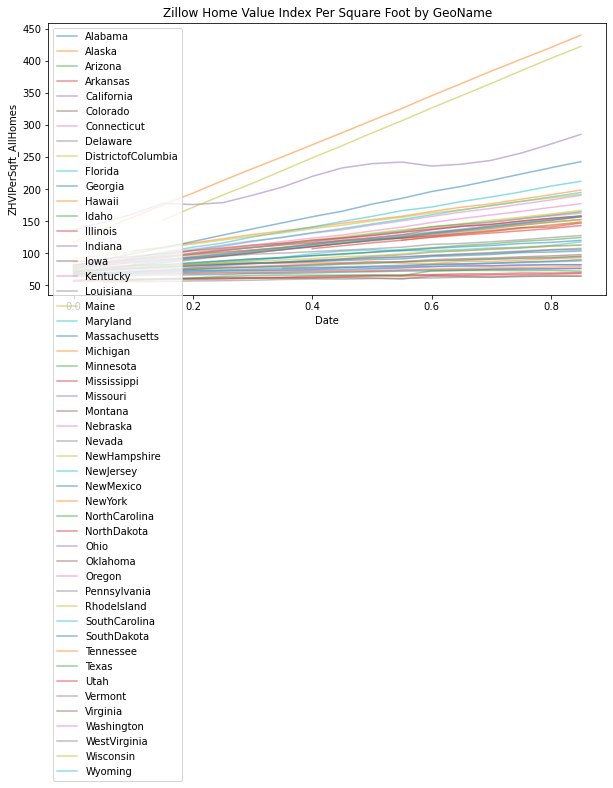

In [43]:
predictions = ((algea_advi_trace.posterior_predictive.y.values[0]).mean(axis=0))

stds = ((algea_advi_trace.posterior_predictive.y.values[0]).std(axis=0))

fresh_df = merged_df.copy()

fresh_df["prediction"] = predictions

fresh_df["std"] = stds

plus2 = predictions + (2*stds)
minus2 = predictions - (2*stds)

fresh_df["upperbound"] = plus2
fresh_df["lowerbound"] = minus2

figsize = (10, 5)
fig, ax = plt.subplots(figsize=figsize)

# Group by 'GeoName' and iterate over groups to plot each line
for geo_name, group_df in fresh_df.groupby('GeoName'):
    ax.plot(group_df.instance, group_df['prediction'], label=geo_name, alpha=0.5)
    #ax.plot_hdi(group_df.instance, algea_advi_trace.posterior.mu.mean(dim=['draw','chain']).values, hdi_prob=0.5, smooth=False, color='gray', ax=ax)

# Customize the plot as needed
ax.set_title('Zillow Home Value Index Per Square Foot by GeoName')
ax.set_xlabel('Date')
ax.set_ylabel('ZHVIPerSqft_AllHomes')
ax.legend()
plt.show()

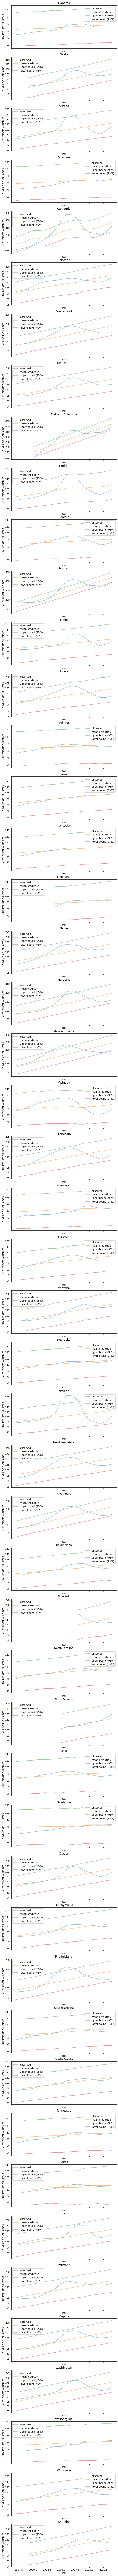

In [44]:
fig, ax = plt.subplots(50, 1, figsize=(8, 200), sharex=True)
z = 0
for geo_name, group_df in fresh_df.groupby('GeoName'):
    ax[z].set_title(geo_name)
    ax[z].plot(group_df.year, group_df['ZHVIPerSqft_AllHomes'], label='observed', alpha=0.5)
    ax[z].plot(group_df.year, group_df['prediction'], label='mean prediction', alpha=0.5)
    ax[z].plot(group_df.year, group_df['upperbound'], label='upper bound (95%)', alpha=0.5)
    ax[z].plot(group_df.year, group_df['lowerbound'], label='lower bound (95%)', alpha=0.5)
    ax[z].set_xlabel('Year')
    ax[z].set_ylabel('ZHVIPerSqft_AllHomes')
    ax[z].legend()
    z+=1


plt.show()

# Out of Sample Predictions

In [45]:
mn_states = post['GeoName'].unique()
num = post.instance.values
new_coords = {"obs_id": np.arange(num.size)}
new_coords["State"] = mn_states
    

In [46]:
geo_mapping = {geo: i for i, geo in enumerate(sorted(post['GeoName'].unique()))}

# Create a new column based on the mapping
post['district_idx'] = post['GeoName'].map(geo_mapping)

# Display the DataFrame
post

/var/folders/x_/qkfj00656_qg6nsj5fclf5sc0000gn/T/ipykernel_88972/3827960993.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post['district_idx'] = post['GeoName'].map(geo_mapping)


,ZHVIPerSqft_AllHomes,year,month,GeoName,materials,trade,public,service,information,industry,other,instance,district_idx
10425,72.0,2015,1,Alabama,-0.162462,-0.213959,-0.068783,-0.293733,-0.279144,-0.110155,-0.149449,0.9,0
10426,179.0,2015,1,Alaska,0.036013,-0.616303,-0.637559,-0.607155,-0.602032,-0.766384,-0.717630,0.9,1
10427,115.0,2015,1,Arizona,-0.057719,0.153726,0.195054,0.231468,0.089336,-0.160716,-0.030747,0.9,2
10428,70.0,2015,1,Arkansas,-0.149554,-0.362090,-0.436787,-0.474053,-0.453322,-0.444480,-0.474785,0.9,3
10429,279.0,2015,1,California,2.163151,6.121157,6.450768,6.970408,6.985642,5.811887,5.803725,0.9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11670,144.0,2017,1,Virginia,-0.232478,0.398758,1.081046,0.489918,0.806777,0.313422,0.853073,1.0,45
11671,194.0,2017,1,Washington,0.011487,0.881704,0.671091,0.709921,0.786733,0.649097,0.522916,1.0,46
11672,74.0,2017,1,WestVirginia,-0.017496,-0.590949,-0.535139,-0.536365,-0.562002,-0.639239,-0.635590,1.0,47
11673,109.0,2017,1,Wisconsin,-0.087135,0.116847,0.152691,-0.025822,0.049978,0.489031,0.084453,1.0,48


In [47]:
with hierarchical_model:
    pm.set_data(
        {  
            "district_idx": post['district_idx'].to_numpy(),
            "time": post["instance"].to_numpy(),
            "information": post["information"].to_numpy(),
            "materials": post["materials"].to_numpy(),
            "trade": post["trade"].to_numpy(),
            "service": post["service"].to_numpy(),
            "industry": post["industry"].to_numpy(),
            "other": post["other"].to_numpy()
        }, coords = new_coords
    )
    counterfactual = pm.sample_posterior_predictive(
        algea_advi_trace, var_names=["y"], random_seed=3,
        extend_inferencedata=True, predictions=True
    )

Sampling: [y]


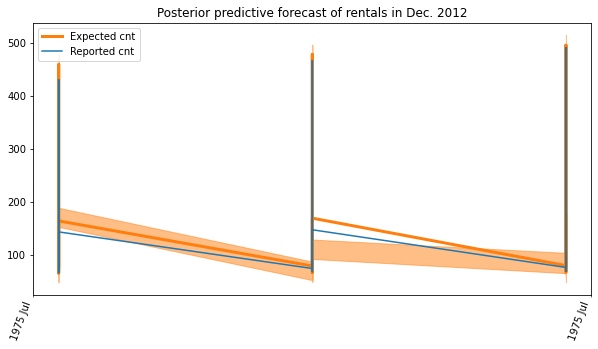

In [48]:
fig, ax = plt.subplots(figsize=figsize)



plot_xY(post.year, counterfactual.predictions["y"], ax, label='Expected cnt')
format_x_axis(ax, minor=True)
ax.plot(post.year, post["ZHVIPerSqft_AllHomes"], label="Reported cnt")
ax.set(title="Posterior predictive forecast of rentals in Dec. 2012")
plt.legend();

In [51]:
df = post.copy()
quantiles = counterfactual.predictions["y"].quantile((0.025, 0.25, 0.5, 0.75, 0.975), dim=("chain", "draw")).transpose()

# Create new columns in the DataFrame based on quantiles
df['Quantile_0.025'] = quantiles[:, 0]
df['Quantile_0.25'] = quantiles[:, 1]
df['Quantile_0.5'] = quantiles[:, 2]
df['Quantile_0.75'] = quantiles[:, 3]
df['Quantile_0.975'] = quantiles[:, 4]
df['mean'] = counterfactual.predictions.y.values[0].mean(axis=0)

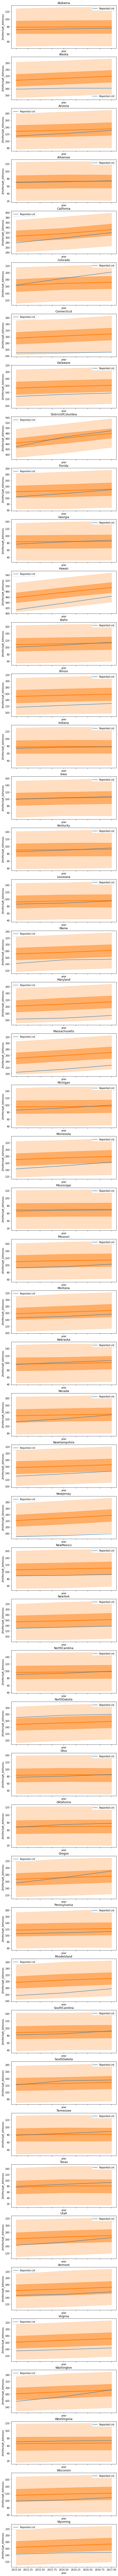

In [52]:
fig, ax = plt.subplots(50, 1, figsize=(8, 200), sharex=True)
z = 0
for geo_name, group_df in df.groupby('GeoName'):
    ax[z].set_title(geo_name)



    az.plot_hdi(
        group_df.year,
        hdi_data= group_df[['Quantile_0.025', 'Quantile_0.975']].values,
        fill_kwargs={"alpha": 0.25},
        smooth=False,
        ax=ax[z],
    )
    
    az.plot_hdi(
       group_df.year,
        hdi_data= group_df[['Quantile_0.25', 'Quantile_0.75']].values,
        fill_kwargs={"alpha": 0.5},
        smooth=False,
        ax=ax[z],
    )

    ax[z].plot(group_df.year, group_df[['mean']].values, color="C1", lw=3, label='')
    ax[z].plot(group_df.year, group_df["ZHVIPerSqft_AllHomes"], label="Reported cnt")


    ax[z].set_xlabel('year')
    ax[z].set_ylabel('ZHVIPerSqft_AllHomes')
    ax[z].legend() 
    z+=1
    

plt.show()

### Predictions look fairly decent, with most of the observed (blue line) falling within the 50% interval of uncertainty. However some states vary singifcantly in performance. Let's check the total RMSE and RMSE per state

In [54]:
preds = counterfactual.predictions.y.values[0].mean(axis=0)
reals = np.array(post['ZHVIPerSqft_AllHomes'])

rmse = np.sqrt(np.mean((reals - preds)**2))

In [55]:
rmse

21.262383104652194

### Not bad, let's check if there is a skew

In [56]:
result_data = []

for geo_name, group_df in df.groupby('GeoName'):
    rmse_value = np.sqrt(np.mean((group_df['ZHVIPerSqft_AllHomes'] - group_df['mean'])**2))
    rounded_rmse = round(rmse_value, 2)
    
    result_data.append({
        'GeoName': geo_name,
        'RMSE': rounded_rmse
    })

result_df = pd.DataFrame(result_data)
result_df_sorted = result_df.sort_values(by='RMSE').reset_index(drop=True)
result_df_sorted



,GeoName,RMSE
0,Iowa,1.17
1,Arkansas,1.51
2,Mississippi,2.34
3,Indiana,2.47
4,Kentucky,3.44
5,NorthCarolina,3.86
6,Nebraska,4.00
7,Ohio,4.16
8,Georgia,4.21
9,Tennessee,4.79


### As expected, there is a high end skew due to some states having extremely large error like New Jersey. But the relative major fall below or close to the average of 20 units of error when predicting ZHVI per sqft.